# Homework 8

**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 30th, 2018 at 11:00am

**Instructions:**

- Upload your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import time
from sklearn.model_selection import train_test_split

import pymc3 as pm
import theano.tensor as T

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('talk')
%matplotlib inline




## Problem 1: Understanding Yelp Review Data As a Human
In this course, we've spent a lot of time learning algorithms for performing inference on complex models and we've spent time using these models to make decisions regarding our data. But in nearly every assignment, the model for the data is specified in the problem statement. In real life, the creative and, arguably, much more difficult task is to start with a broadly defined goal and then to customize or create a model which will meet this goal in some way. 



Problem #1 is atypical in that it does not involve any programming or (necessarily) difficult mathematics/statistics. The process of answering these questions *seriously* will however give you an idea of how one might create or select a model for a particular application and your answers will help you with formalizing the model if and when you're called upon to do so.

***Grading:*** *We want you to make a genuine effort to mold an ambiguous and broad real-life question into a concrete data science or machine learning problem without the pressure of getting the "right answer". As such, we will grade your answer of Problem #1 on a pass/fail basis. Any reasonable answer that demonstrates actual effort will be given a full grade.*

We've compiled for you a fairly representative selection of [Yelp reviews](./yelp_reviews.zip) for a (now closed) sushi restaurant called Ino's Sushi in San Francisco. Read the reviews and form an opinion regarding the various qualities of Ino's Sushi. Answer the following:

1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

  (**Hint:** Begin by summarizing each review. For each review, summarize the reviewer's opinion on two aspects of the restaurant: food and service. That is, generate a classification ("good" or "bad") for each aspect based on what the reviewer writes.) 
  
3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 

4. Identify all the ways in which the task in #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

5. Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review.

### Answer to Problem 1

#### 1. If the task is to summarize the quality of a restaurant in a simple and intuitive way, what might be problematic with simply classifying this restaurant as simply "good" or "bad"? Justify your answers with specific examples from the dataset.

**Answer**: The quality of restaurants depends on various factors, such as food, service, location, price, and etc. Classifying the restaurant simply as "good" or "bad" fails to reveal the quality of individual aspects. A customer could have different reviews on different aspects of a restaurant. For example, in review 04 the reviewer comments the food as "high quality", but the service as "absolutely horrendous". The simple classification is unable to catch such information.

#### 2. For Ino's Sushi, categorize the food and the service, separately, as "good" or "bad" based on all the reviews in the dataset. Be as systematic as you can when you do this.

**Answer**: We can categorize each aspect as "good", "bad", or "no comment" for each review. The classificaiton is as follows.  

|ID|Food|Service|
|---|:---:|---:|
|1|good|bad|
|2|good|bad|
|3|no comment|bad|
|4|good|bad|
|5|good|good|
|6|good|good|
|7|good|good|
|8|good|good|
|9|no comment|bad|
|10|good|good|

All reviews which contain comments on food marks the food as good, although comments on food are missing in 2 reviews. Thus we can categorize the food as "good" for Ino's Sushi. In terms of service, there are 5 reviews suggesting the service is good, and the other 5 reviews suggest the service is bad. We are unable to simply categorize the service as "good" or "bad" according the 10 reviews for Ino's Sushi.

#### 3. Identify statistical weaknesses in breaking each review down into an opinion on the food and an opinion on the service. That is, identify types of reviews that make your method of summarizing the reviewer's optinion on the quality of food and service problemmatic, if not impossible. Use examples from your dataset to support your argument. 

**Answer**:
1. There would be some missing values for some reviews. For example, the reviewer's opinion on the food is not available in the review 3 and 9.
2. the binary classification of food quality would not be expressive enough when the reviewer has positive comments on some food but negative comments on some other food. For example, in review 01 the review thinks ankimo nigiri "had too much rice", but "the liver was tasty and succulent".

#### 4. Identify all the ways in which the task in #2 might be difficult for a machine to accomplish. That is, break down the classification task into simple self-contained subtasks and identify how each subtask can be accomplished by a machine (i.e. which area of machine learning, e.g. topic modeling, sentiment analysis etc, addressess this type of task).

**Answer**: We can break down the classification task into subtasks as follows:
1. Identify the topic for each sentence. This can be done through topic modeling methods, such as latent Dirichlet allocation (LDA).
2. Determine the sentiment of each sentence for each topic in each review through sentiment analysis. For example, we can use naive Bayes classifier via bag-of-words.
3. Determine the sentiment for each topic in each review by somehow aggregating the sentiment of individual sentences. For example, the simplest way is to take the average of the probability that each sentence for a topic in a review is positive.  

#### 5. Describe a complete pipeline for processing and transforming the data to obtain a classification for both food and service for each review.

**Answer**: For the text of each review, we can process and transform the data as follows:
1. Calculate the probability that each sentence belongs to each topic (food / service).
2. Assign each sentence to the topic with higher probability.
3. Calculate the probability that each sentence is positive through naive Bayes via bag-of-words, i.e.,
$$P(\text{positive}\ |\ \text{sentence})\approx P(\text{positive}\ |\ w_1, w_2, ..., w_n)=\frac{P(w_1, w_2, ..., w_n\ |\ \text{positive})\ P(\text{positive})}{P(w_1, w_2, ..., w_n\ |\ \text{positive})\ P(\text{positive}) + P(w_1, w_2, ..., w_n\ |\ \text{negative})\ P(\text{negative})},$$ where $$P(w_1, w_2, ..., w_n\ |\ \text{positive}) \approx \prod_i P(w_i\ |\ \text{positive}).$$
4. Take the average of the above probabilities for each topic, and label the food / sevice for the review by comparing it with a pre-defined threshold (say, 0.5).

## Problem 2: My Sister-In-Law's Baby Cousin Tracy ...


Wikipedia describes the National Annenberg Election Survey as follows -- "National Annenberg Election Survey (NAES) is the largest academic public opinion survey conducted during the American presidential elections. It is conducted by the Annenberg Public Policy Center at the University of Pennsylvania."  In the file [survey.csv](./survey.csv) we provide the following data from the 2004 National Annenberg Election Survey:  `age` -- the age of the respondents, `numr` -- the number of responses, and `knowlgbtq` -- the number of people at the given age who have at least one LGBTQ acquaintance.  We want you to model how age influences likelihood of interaction with members of the LGBTQ community in three ways. 


1. Using pymc3, create a bayesian regression model (either construct the model directly or use the glm module) with the same feature and dependent variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?

For GP Regression, we can model the likelihood of knowing someone LGBTQ as a product of binomials -- one binomial distribution per age group. 

$$p(y_a | \theta_a, n_a) = Binom( y_a, n_a, \theta_a)$$

where $y_a$ (i.e. `knowlgbtq`) is the observed number of respondents who know someone lgbtq  at age $a$, $n_a$ (i.e. `numr`) is the number of trials and $\theta_a$ is the rate parameter for having an lgbtq acquaintance at age $a$.

Using the Gaussian approximation  (http://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation) to approximate the Binomial since `numr` is large, you can simply use a GP posterior with the error for each measurement to be given using this approximation. 

### Answer to Problem 2

In [2]:
x_fit2 = np.linspace(0, 100, 101)

data2 = pd.read_csv('survey.csv')
data2['ratio'] = data2.knowlgbtq / data2.numr
print(data2.shape)
data2.head()

(78, 4)


,age,numr,knowlgbtq,ratio
0,18,310,158,0.509677
1,19,221,118,0.533937
2,20,217,120,0.552995
3,21,255,131,0.513725
4,22,301,168,0.558140


#### 1. Using pymc3, create a bayesian regression model (either construct the model directly or use the glm module) with the same feature and dependent variable. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

In [3]:
with pm.Model() as m21:
    pm.GLM.from_formula('ratio ~ age', data2)
    step = pm.NUTS()

In [4]:
with m21:
    trace21 = pm.sample(10000, tune=5000, step=step, njobs=2)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd_log__, age, Intercept]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.622029831439, but should be close to 0.8. Try to increase the number of tuning steps.


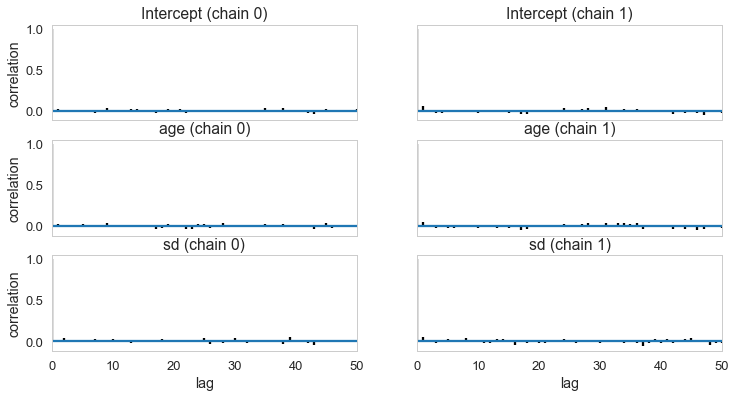

In [5]:
pm.autocorrplot(trace21[::4], max_lag=50);

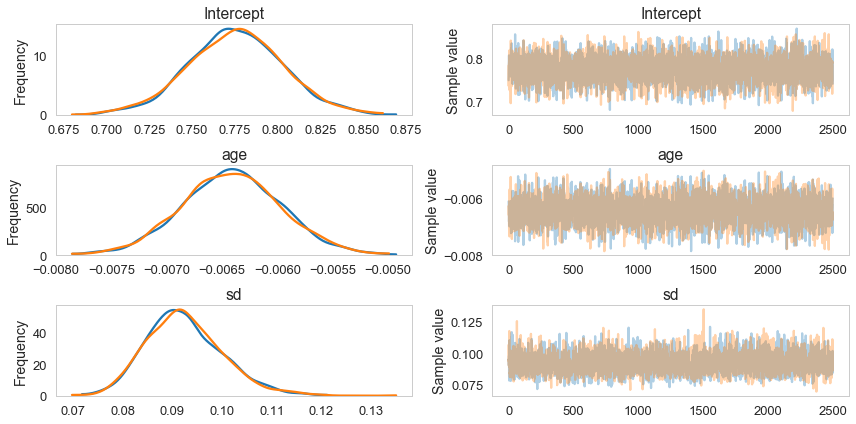

In [6]:
pm.traceplot(trace21[::4]);

In [7]:
print('Gelman-Rubin')
print(pm.gelman_rubin(trace21[::4]))

Gelman-Rubin
{'Intercept': 0.99980001580201716, 'age': 0.99980172026672909, 'sd': 0.9998366004833007}


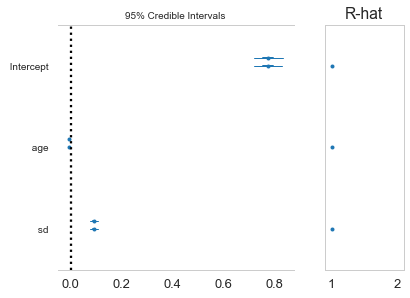

In [8]:
pm.forestplot(trace21[::4]);

In [9]:
print('Effective sample sizes')
print(pm.effective_n(trace21[::4]))

Effective sample sizes
{'Intercept': 4660.0, 'age': 4735.0, 'sd': 3867.0}


The above tests suggest the convergence of the model, and negligible autocorrelations for parameters when we set thining as 4.

In [10]:
intercept21, x_coef21, sd21 = trace21[::4].get_values('Intercept').reshape(-1, 1), \
trace21[::4].get_values('age').reshape(-1, 1), trace21[::4].get_values('sd')

y_fit21 = intercept21 + x_coef21 * x_fit2
mu21 = y_fit21.mean(axis=0)
sig21 = 2 * y_fit21.std(axis=0)

n21 = 10000
ppc_samples21 = np.zeros((n21, len(x_fit2)))

for i in range(n21):
    k = np.random.randint(len(sd21))
    ppc_samples21[i, :] = np.random.normal(y_fit21[k], sd21[k])

ppc_mean21 = ppc_samples21.mean(axis=0)
ppc_std21 = ppc_samples21.std(axis=0)

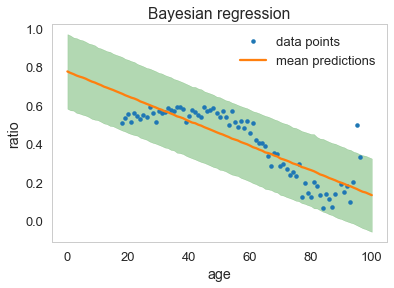

In [11]:
plt.plot(data2.age, data2.ratio, '.', label='data points');
plt.plot(x_fit2, ppc_mean21, label='mean predictions');
plt.fill_between(x_fit2, ppc_mean21 - 2 * ppc_std21, ppc_mean21 + 2 * ppc_std21, \
                 color='green', alpha=0.3);
plt.xlabel('age');
plt.ylabel('ratio');
plt.legend();
plt.title('Bayesian regression');

The model seems to underfit.

#### 2. Using pymc3, create a 1-D Gaussian Process regression model with the same feature and dependent variables.  Use a squared exponential covariance function. Plot the mean predictions for ages 0-100, with a 2-sigma envelope.

In [12]:
with pm.Model() as m22:
    l = pm.HalfCauchy('l', 10)
    eta = pm.HalfCauchy('eta', 1)
    sigma = pm.HalfCauchy('sigma', 5)
    
    K = (eta ** 2) * pm.gp.cov.ExpQuad(1, l)
    
    gp22 = pm.gp.Marginal(cov_func=K)
    ratio_obs = gp22.marginal_likelihood('ratio', X=data2.age.values.reshape(-1, 1), \
                                         y=data2.ratio.values - data2.ratio.values.mean(), \
                                         noise=sigma)

In [13]:
with m22:
    step = pm.NUTS()
    trace22 = pm.sample(5000, tune=2000, step=step, njobs=2)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, eta_log__, l_log__]
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


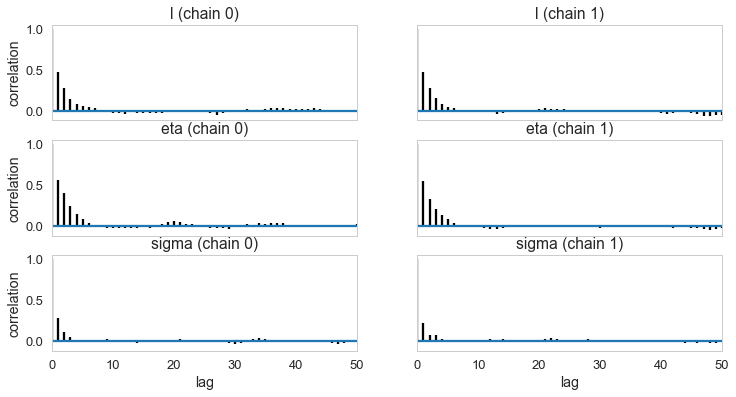

In [14]:
pm.autocorrplot(trace22, max_lag=50);

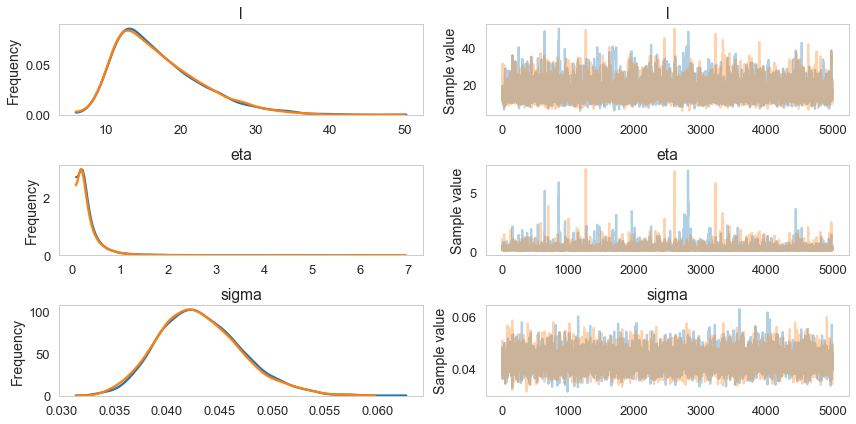

In [15]:
pm.traceplot(trace22);

In [16]:
print('Gelman-Rubin')
print(pm.gelman_rubin(trace22))

Gelman-Rubin
{'l': 0.99990029337149111, 'eta': 0.99993970642236507, 'sigma': 1.0000478745395196}


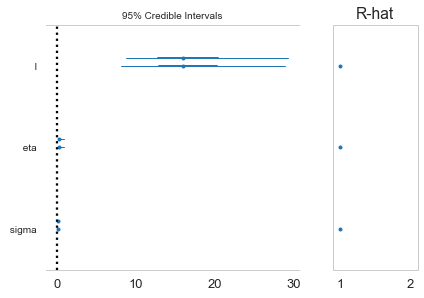

In [17]:
pm.forestplot(trace22);

In [18]:
print('Effective sample sizes')
print(pm.effective_n(trace22))

Effective sample sizes
{'l': 3108.0, 'eta': 2605.0, 'sigma': 5412.0}


The above tests demonstrate the convergence of the model.

In [19]:
with m22:
    y_pred22 = gp22.conditional('y_pred', Xnew=x_fit2.reshape(-1, 1), pred_noise=True)
    gp_samples22 = pm.sample_ppc(trace22, vars=[y_pred22], samples=10000)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:05<00:00, 153.43it/s]


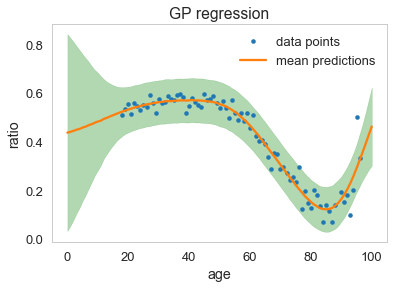

In [20]:
ppc_22 = gp_samples22['y_pred'] + data2.ratio.mean()

plt.plot(data2.age, data2.ratio, '.', label='data points');
plt.plot(x_fit2, ppc_22.mean(axis=0), label='mean predictions');
plt.fill_between(x_fit2, ppc_22.mean(axis=0) - 2 * ppc_22.std(axis=0), \
                 ppc_22.mean(axis=0) + 2 * ppc_22.std(axis=0), \
                 color='green', alpha=0.3);
plt.xlabel('age');
plt.ylabel('ratio');
plt.legend();
plt.title('GP regression');

#### 3. How do the models compare? Does age influence likelihood of acquaintance with someone LGBTQ? For Bayesian Linear Regression and GP Regression, how does age affect the variance of the estimates?

**Answer**: Underfitting occurs to the bayesian regression model since only linear coefficient is used, while GP regression model fits the data very well.

Age influences the likelihood of acquaintance with someone LGBTQ. Bayesian regression model indicates negative correlation between the likelihood and the age. GP regression model indicates that the likelihood first increases slowly as age increases until around 50, then decreases as age increases; the pattern shown for ages > 85 is presumably due to small sample size in the survey.

In the bayesian regression model, the variance of the estimates seems to remain at the same level for different ages. In the GP regression model, the variance of the estimates is larger for ages far away from available data points; the variance of the estimates for ages available in the data set is smaller than that in the bayesian regression model.

## Problem 3:  Like a Punch to the Kidneys 

In this problem we will work with the US Kidney Cancer Dataset (by county), a dataset of kidney cancer frequencies across the US over 5 years on a per county basis. 

The kidney cancer data can be found [here](./kcancer.csv).

A casual inspection of the data might suggest that we independently model cancer rates for each of the provided counties.  Our experience in past homeworks/labs/lectures (in particular when we delved into the Rat Tumors problem) suggests potential drawbacks of conclusions based on raw cancer rates.  Addressing these drawbacks, let's look use a Bayesian model for our analysis of the data. In particular you will implement an Empircal Bayes model to examine the adjusted cancer rates per county.

Let $N$ be the number of counties; let $y_j$ the number of kidney cancer case for the $j$-th county, $n_j$ the population of the $j$-th county and $\theta_j$ the underlying kidney cancer rate for that county. We can construct a Bayesian model for our data as follows:
\begin{aligned}
y_j &\sim Poisson(5 \cdot n_j \cdot \theta_j), \quad j = 1, \ldots, N\\
\theta_j &\sim Gamma(\alpha, \beta), \quad j = 1, \ldots, N
\end{aligned}
where $\alpha, \beta$ are hyper-parameters of the model.

- (#1) Implement Empirical Bayes via moment matching as described as follows. Consider the **prior-predictive** distribution (also called the evidence i.e. the denominator normalization in bayes theorem) of the model: $p(y) = \int p(y \vert \theta) p(\theta) d \theta$. Why the prior-predictive? Because technically we "haven't seen" individual county data yet.  For this model, the prior-predictive is a negative binomial. Matching the mean and the variance of the negative binomial to that from the data, you can find appropriate expressions for $\alpha$ and $\beta$. (Hint: You need to be careful with the $5n_j$ multiplier.) 

- (#2) Produce a scatter plot of the raw cancer rates (pct mortality) vs the county population size. Highlight the top 300 raw cancer rates in red. Highlight the bottom 300 raw cancer rates in blue. Finally, on the same plot add a scatter plot visualization of the posterior mean cancer rate estimates (pct mortality) vs the county population size, highlight these in green.

- (#3) Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

(**Hint:** You might also find it helpful to follow the Rat Tumor example.)

(**Note:** Up until now we've had primarily thought about the posterior predictive: $\int p( y \vert \theta) p(\theta \vert D) d\theta$.  The posterior predictive and the prior predictive can be somewhat connected. In conjugate models such as ours, the two distributions have the same form.) 

### Answer to Problem 3

In [2]:
data3 = pd.read_csv('kcancer.csv')
print(data3.shape)
data3.head()

(3113, 7)


,state,fips,county,countyfips,dc,pop,pct_mortality
0,ALABAMA,1,AUTAUGA,1001,1.0,64915.0,0.000015
1,ALABAMA,1,BALDWIN,1003,15.0,195253.0,0.000077
2,ALABAMA,1,BARBOUR,1005,1.0,33987.0,0.000029
3,ALABAMA,1,BIBB,1007,1.0,31175.0,0.000032
4,ALABAMA,1,BLOUNT,1009,5.0,91547.0,0.000055


#### 1. Implement Empirical Bayes via moment matching

**Answer**: The prior-predictive of $y_i$ satisfies $\text{NB}(\alpha, \frac{5n_j}{\beta+5n_j})$, i.e., 
$$r=\alpha, $$
$$p=\frac{5n_j}{\beta+5n_j}.$$
We have
$$\mathrm{E}(y_j) = \frac{pr}{1-p}=5n_j\frac{\alpha}{\beta},$$
$$\mathrm{Var}(y_j) = \frac{pr}{(1-p)^2}=5n_j\alpha(\frac{1}{\beta}+\frac{5n_j}{\beta^2}).$$
And thus,
$$\mathrm{E}(\frac{y_j}{n_j}) = \frac{1}{n_j}\mathrm{E}(y_j)=5\frac{\alpha}{\beta},$$
$$\mathrm{Var}(\frac{y_j}{n_j}) = \frac{1}{n_j^2}\mathrm{Var}(y_j)=5\alpha(\frac{1}{n_j\beta}+\frac{5}{\beta^2}).$$
Therefore, we can estimate $\alpha$ and $\beta$ by
$$\beta=\frac{5}{\frac{\mathrm{Var}(\frac{y_j}{n_j})}{\mathrm{E}(\frac{y_j}{n_j})}-\frac{1}{n_j}},$$
$$\alpha=\frac{1}{5}\beta\mathrm{E}(\frac{y_j}{n_j}),$$
where $\mathrm{E}(\frac{y_j}{n_j}), \mathrm{Var}(\frac{y_j}{n_j})$ can be estimated through data points, and $n_j$ can be approximated by the mean value.

In [3]:
mu31 = data3.pct_mortality.mean()
var31 = data3.pct_mortality.var()

beta31 = 5 / (var31/mu31 - 1/data3['pop'].mean())
alpha31 = beta31 * mu31 / 5
print('alpha = {}'.format(alpha31))
print('beta = {}'.format(beta31))

alpha = 1.54459458659545
beta = 133464.15033286557


#### 2. Produce a scatter plot

The posterior $\theta_j|y_j \sim \mathrm{Gamma}(\alpha+y_j, \beta+5n_j)$. Therefore, we can estimate the cancer rate by $\frac{5(\alpha+y_j)}{(\beta+5n_j)}$.

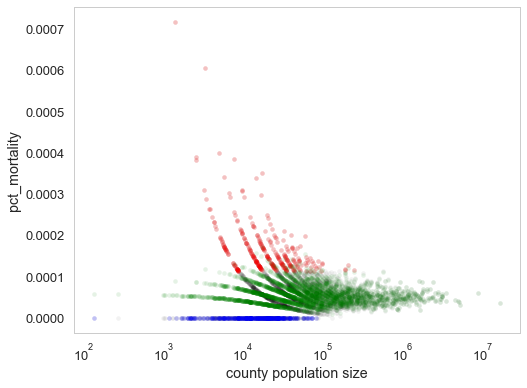

In [4]:
data3['post_mean'] = 5 * (alpha31 + data3['dc']) / (beta31 + 5 * data3['pop'])

top_ind32 = np.argsort(data3.pct_mortality)[::-1][:300]
bottom_ind32 = np.argsort(data3.pct_mortality)[:300]

plt.figure(figsize=(8, 6))
plt.semilogx(data3['pop'], data3['pct_mortality'], 'k.', alpha=0.05);
plt.semilogx(data3['pop'][top_ind32], data3['pct_mortality'][top_ind32], 'r.', alpha=0.2);
plt.semilogx(data3['pop'][bottom_ind32], data3['pct_mortality'][bottom_ind32], 'b.', alpha=0.2);
plt.semilogx(data3['pop'], data3['post_mean'], 'g.', alpha=0.1);
plt.xlabel('county population size');
plt.ylabel('pct_mortality');

#### 3. Using the above scatter plot, explain why using the posterior means from our model to estimate cancer rates is preferable to studying the raw rates themselves.

**Answer**: As we can see, red (top 300 rates) and blue (bottom 300 rates) points are mostly with small county population size, indicating the rates are skewed by the county population size. Counties with small population size tend to have very low or very high cancer mortality rates since it is very sensitive to "outliers". Thus it is not suitable to compare mortality rates between counties directly, especially for those small counties.

Green points indicate posterior means are shrunk to the prior distribution (with the empirically estimated parameters), espically for small counties, due to the pooling effect. Therefore, it is better to use the posterior means to estimate cancer rates since the population size would have a smaller effect on the results.

## Problem 4: In the Blink of a Bayesian Iris

We've done classification before, but the goal of this problem is to introduce you to the idea of classification using Bayesian inference. 

Consider the famous *Fisher flower Iris data set* a  multivariate data set introduced by Sir Ronald Fisher (1936) as an example of discriminant analysis. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, you will build a model to predict the species. 

For this problem only consider two classes: **virginica** and **not-virginica**. 

The iris data can be obtained [here](./iris.csv).

Let $(X, Y )$ be our dataset, where $X=\{\vec{x}_1, \ldots \vec{x}_n\}$ and $\vec{x}_i$ is the standard feature vector corresponding to an offset 1 and the four components explained above. $Y \in \{0,1\}$ are the scalar labels of a class. In other words the species labels are your $Y$ data (virginica = 0 and virginica=1), and the four features -- petal length, petal width, sepal length and sepal width -- along with the offset make up your $X$ data. 

The goal is to train a classifier, that will predict an unknown class label $\hat{y}$ from a new data point $x$. 

Consider the following glm (logistic model) for the probability of a class:

$$ p(y) = \frac{1}{1+e^{-x^T \beta}} $$

(or $logit(p) = x^T \beta$ in more traditional glm form)

where $\beta$ is a 5D parameter to learn. 

Then given $p$ at a particular data point $x$, we can use a bernoulli likelihood to get 1's and 0's. This should be enough for you to set up your model in pymc3. (Other Hints: also use theano.tensor.exp when you define the inverse logit to go from $\beta$ to $p$, and you might want to set up $p$ as a deterministic explicitly so that pymc3 does the work of giving you the trace).

Use a 60-40 stratified (preserving class membership) split of the dataset into a training set and a test set. (Feel free to take advantage of scikit-learn's `train_test_split`).

1. Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the normalized posterior $p(\beta| Y,X)$. Since we dont care about regularization here, just use the mostly uninformative value $\sigma = 10$.
2. Find the MAP and mean estimate for the posterior on the training set.
3. Implement a  sampler to sample from this posterior of $\beta$.   Generate samples of $\beta$ and plot the sequence of $\beta$'s  and histograms for each $\beta$ component.



### Answer to Problem 4

In [5]:
data4 = pd.read_csv('iris.csv')
data4['y'] = (data4['class'].values == ' Iris-virginica').astype(int)
print(data4.shape)
data4.head()

(150, 6)


,sepal_length,sepal_width,petal_length,petal_width,class,y
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data4.iloc[:, :4].values, data4['y'].values, \
                                                    test_size=0.4, stratify=data4['y'].values, random_state=0)
X_train = np.concatenate((np.ones(len(X_train)).reshape(-1, 1), X_train), axis=1)
X_test = np.concatenate((np.ones(len(X_test)).reshape(-1, 1), X_test), axis=1)

#### 1. Choose a prior for $\beta \sim N(0, \sigma^2 I) $ and write down the formula for the normalized posterior $p(\beta| Y,X)$.

**Answer**: Let $k$ be the dimension of $\beta$, we have
$$p(\beta) = \frac{e^{-\frac{1}{2}\beta^T(\sigma^2 I)^{-1}\beta}}{\sqrt{(2\pi)^k|\sigma^2I|}}
=\frac{e^{\frac{\beta^T\beta}{2\sigma^2}}}{(2\pi\sigma)^{k/2}}$$
$$p(Y,X|\beta) = \prod_i{(\frac{1}{1+e^{-x_i^T\beta}})^{y_i}(\frac{e^{-x_i^T\beta}}{1+e^{-x_i^T\beta}})^{1-y_i}}$$
Therefore, 
$$p(\beta|Y,X) = \frac{p(Y,X|\beta)p(\beta)}{\int{p(Y,X|\beta)p(\beta)d\beta}} 
= \frac{(\prod_i{(\frac{1}{1+e^{-x_i^T\beta}})^{y_i}(\frac{e^{-x_i^T\beta}}{1+e^{-x_i^T\beta}})^{1-y_i}})\frac{e^{\frac{\beta^T\beta}{2\sigma^2}}}{(2\pi\sigma)^{k/2}}}{\int (\prod_i{(\frac{1}{1+e^{-x_i^T\beta}})^{y_i}(\frac{e^{-x_i^T\beta}}{1+e^{-x_i^T\beta}})^{1-y_i}})\frac{e^{\frac{\beta^T\beta}{2\sigma^2}}}{(2\pi\sigma)^{k/2}}d\beta}$$

#### 2. Find the MAP and mean estimate for the posterior on the training set.

In [7]:
with pm.Model() as m4:
    beta = pm.Normal('beta', mu=0, sd=10, shape=5)
    p = pm.Deterministic('p', 1 / (1 + T.exp(-T.dot(X_train, beta))))
    y_pred = pm.Bernoulli('y_pred', p=p, observed=y_train)

In [8]:
beta_map4 = pm.find_MAP(model=m4)['beta']

logp = -18.514, ||grad|| = 0.00042632: 100%|█████████████████████████████████████████| 44/44 [00:00<00:00, 1396.85it/s]


In [9]:
with m4:
    step = pm.NUTS()
    trace4 = pm.sample(10000, tune=5000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta]
There were 1958 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.690500601384, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1538 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


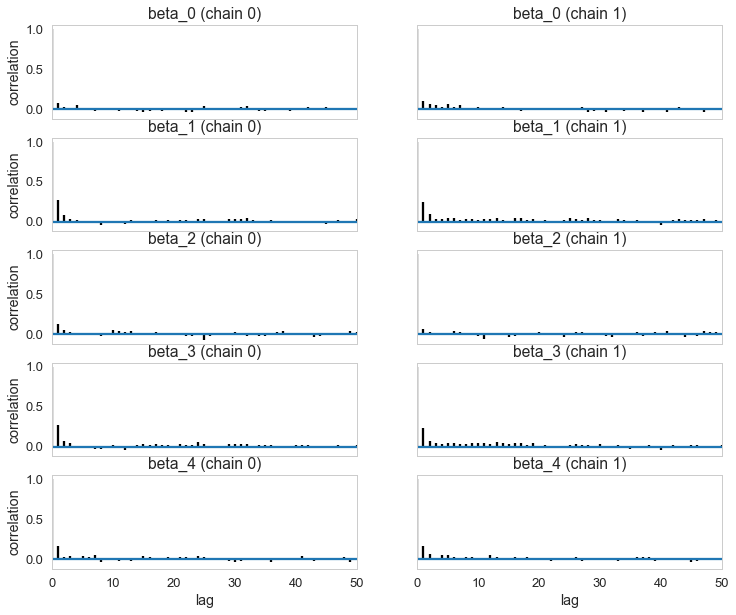

In [10]:
pm.autocorrplot(trace4[::4], varnames=['beta'], max_lag=50);

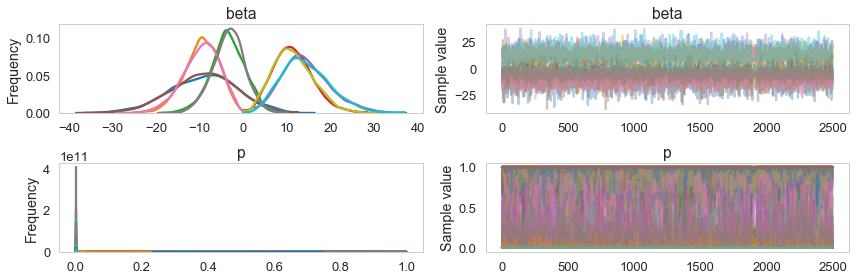

In [11]:
pm.traceplot(trace4[::4]);

In [12]:
print('Gelman-Rubin')
print(pm.gelman_rubin(trace4[::4]))

Gelman-Rubin
{'beta': array([ 0.99980554,  0.99991146,  1.00086991,  0.99980166,  0.99985535]), 'p': array([ 1.00323607,  1.00625265,  1.00128529,  1.0020442 ,  1.0007564 ,
        1.00080997,  0.99983066,  1.00290209,  0.99999147,  1.00239122,
        1.00237308,  1.00377004,  1.00488316,  1.00250348,  1.00062573,
        1.00269686,  0.99980149,  1.0003886 ,  1.00349697,  1.00245735,
        1.00009591,  1.00007138,  1.00216385,  1.00141546,  1.00007165,
        1.00295024,  1.00059345,  1.00033421,  1.0049256 ,  0.999801  ,
        1.00035341,  1.00127124,  0.99999088,  1.00160496,  1.00416007,
        1.00014323,  1.0037534 ,  1.00367953,  1.00348225,  1.00240527,
        0.99992633,  0.99980748,  0.99998475,  1.00316153,  0.99987323,
        1.0019032 ,  0.99980022,  1.00167021,  1.00019012,  1.00058548,
        0.99983891,  1.00174476,  0.99980472,  1.00529423,  1.00036027,
        1.00274617,  1.00033943,  1.00045991,  1.00001666,  1.00388574,
        1.00596341,  1.00609542,  0

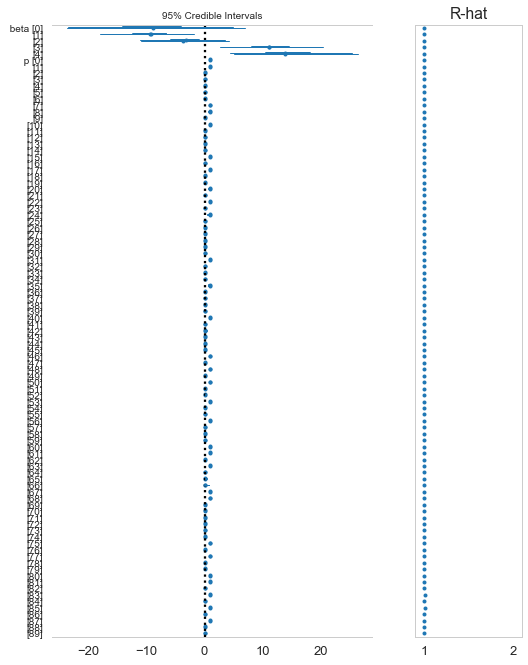

In [13]:
plt.figure(figsize=(8, 10))
pm.forestplot(trace4[::4]);

In [14]:
print('Effective sample sizes')
print(pm.effective_n(trace4[::2]))

Effective sample sizes
{'beta': array([ 4080.,  2845.,  4606.,  2715.,  2780.]), 'p': array([  768.,   224.,  1361.,   344.,   592.,   651.,  2535.,   545.,
        3146.,   307.,  1590.,   355.,   195.,   328.,   575.,   894.,
        1264.,   778.,   237.,   320.,  4213.,  1196.,  1021.,   409.,
        6738.,   265.,  1193.,  1042.,   239.,  3345.,  1220.,   664.,
        2267.,   529.,   208.,  5529.,   280.,   255.,   233.,   303.,
        4509.,  2983.,  2722.,   257.,  4014.,   364.,  2539.,   395.,
        3689.,  1108.,   721.,   394.,  4593.,   536.,  1441.,   280.,
         984.,   781.,  1144.,   215.,   537.,   262.,  4399.,   488.,
         280.,  4756.,  5831.,   797.,   352.,   385.,   714.,  1522.,
         222.,   571.,   313.,  1514.,   269.,   876.,   533.,   285.,
         907.,   649.,   325.,   242.,   435.,   288.,   210.,  1832.,
         210.,   238.])}


The above tests indicate the convergence of the sampler.

In [15]:
beta4 = trace4[::4].get_values('beta')
print('MAP estimate of beta: {}'.format(beta_map4))
print('mean estimate of beta: {}'.format(beta4.mean(axis=0)))

MAP estimate of beta: [ -6.38925752  -6.82498054  -2.76193212   8.05899035  10.87505387]
mean estimate of beta: [ -9.18768335  -9.57726339  -3.48926821  11.4216074   14.47408127]


#### 3. Implement a  sampler to sample from this posterior of $\beta$.   Generate samples of $\beta$ and plot the sequence of $\beta$'s  and histograms for each $\beta$ component.

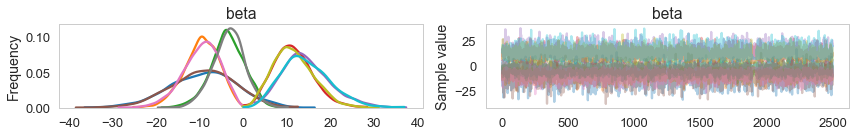

In [16]:
pm.traceplot(trace4[::4], varnames=['beta']);

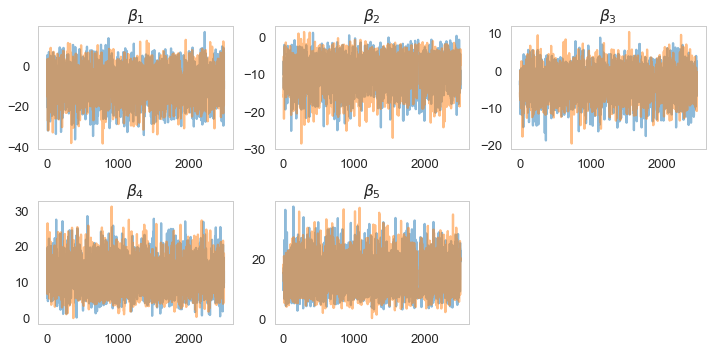

In [17]:
plt.figure(figsize=(10, 5))

for i in range(beta4.shape[1]):
    plt.subplot(2, 3, i+1)
    plt.plot(range(len(beta4)//2), beta4[:len(beta4)//2, i], alpha=0.5)
    plt.plot(range(len(beta4)//2), beta4[len(beta4)//2:, i], alpha=0.5)
    plt.title(r'$\beta_{}$'.format(i + 1))
plt.tight_layout()

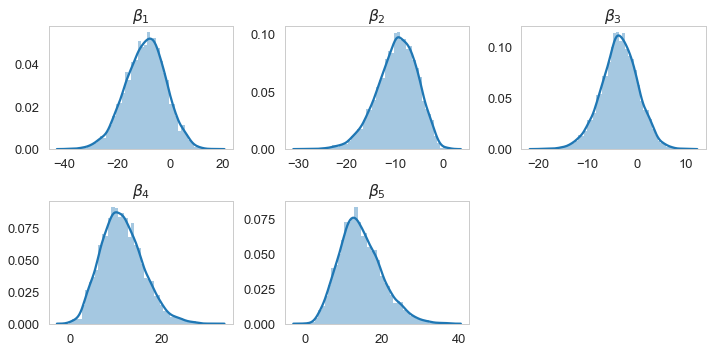

In [18]:
plt.figure(figsize=(10, 5))

for i in range(beta4.shape[1]):
    plt.subplot(2, 3, i+1)
    sns.distplot(beta4[:, i])
    plt.title(r'$\beta_{}$'.format(i + 1))
plt.tight_layout()